In [336]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Question 1

### 1a. Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.

Objective: We seek to compare the "GDP per capita vs life expectancy" across different countries, and not look at the changes that each individual country has undergone over the years, as such we chose to select and prepare our data to best represent that.


Assumptions and Motivate decisions:
   * Seeing that the data was found on a reliable website, we can assume the data reported is accurate and reliable.
   * We decided to remove entries more than 30 years ago as times are so different now and older data would not be as useful in terms of extracting meaning.
   * We also decided to take an average of the life expectancy and GDP per capita for each country as we seek to compare between countries and not compare the progress made by each country, so we decided that by taking an average we are smoothing out any outlier years that a country might have, for example if we chose a specific year to compare between countries, it would not be as fair as each country would be undergoing different circumstances like a natural disaster, war, famine, poverty etc.

In [6]:
#Data_set paths
path_to_life_expectancy_vs_GDP = './life-expectancy-vs-gdp-per-capita.csv'

In [338]:
#Load data into Dataframe
df = pd.read_csv(path_to_life_expectancy_vs_GDP)

In [339]:
# remove rendundant columns
df = df.iloc[:, [0, 2, 3, 4, 6]]

In [340]:
# remove NaN values
df = df.dropna()

In [341]:
# Remove entries that are more than 30 years ago
df = df[df.Year > 1992]

In [345]:
df = df[df.Entity != 'World']

In [7]:
# Add column for GDP
df['GDP'] = df['GDP per capita'] * df['Population (historical estimates)']

NameError: name 'df' is not defined

In [348]:
# Get the unique countries
unique_countries = list(df['Entity'].drop_duplicates())

In [349]:
# Create new dataframe to store data to be plotted
new_df = pd.DataFrame(unique_countries, columns = ['Country'])

In [350]:
# create required columns
new_df['avg_GDP_per_capita'] = None
new_df['avg_life_exp'] = None
new_df['avg_GDP'] = None

In [351]:
# loop to update new dataframe with the mean values of GDP, life expectancy
for i in range(len(list(unique_countries))):
    if new_df.loc[i]['Country'] == unique_countries[i]:
        stats = df[df.Entity == unique_countries[i]].describe()
        new_df.loc[i]['avg_GDP_per_capita'] = stats.loc['mean']['GDP per capita']
        new_df.loc[i]['avg_life_exp'] = stats.loc['mean']['Life expectancy']
        new_df.loc[i]['avg_GDP'] = stats.loc['mean']['GDP']

In [352]:
new_df

,Country,avg_GDP_per_capita,avg_life_exp,avg_GDP
0,Afghanistan,1182.744418,58.611115,34390850510.462013
1,Albania,7058.848191,75.323423,21138293881.79464
2,Algeria,9845.729624,72.808192,349244285936.410583
3,Angola,4800.036321,51.716462,113974940579.058533
4,Argentina,16327.749887,74.483538,645866458090.486084
...,...,...,...,...
160,Venezuela,15537.572228,72.38,411987146285.282288
161,Vietnam,3909.131005,73.848,338740030397.31012
162,Yemen,3940.930364,63.035962,80356230375.512115
163,Zambia,2272.007982,51.375962,30400051602.317326


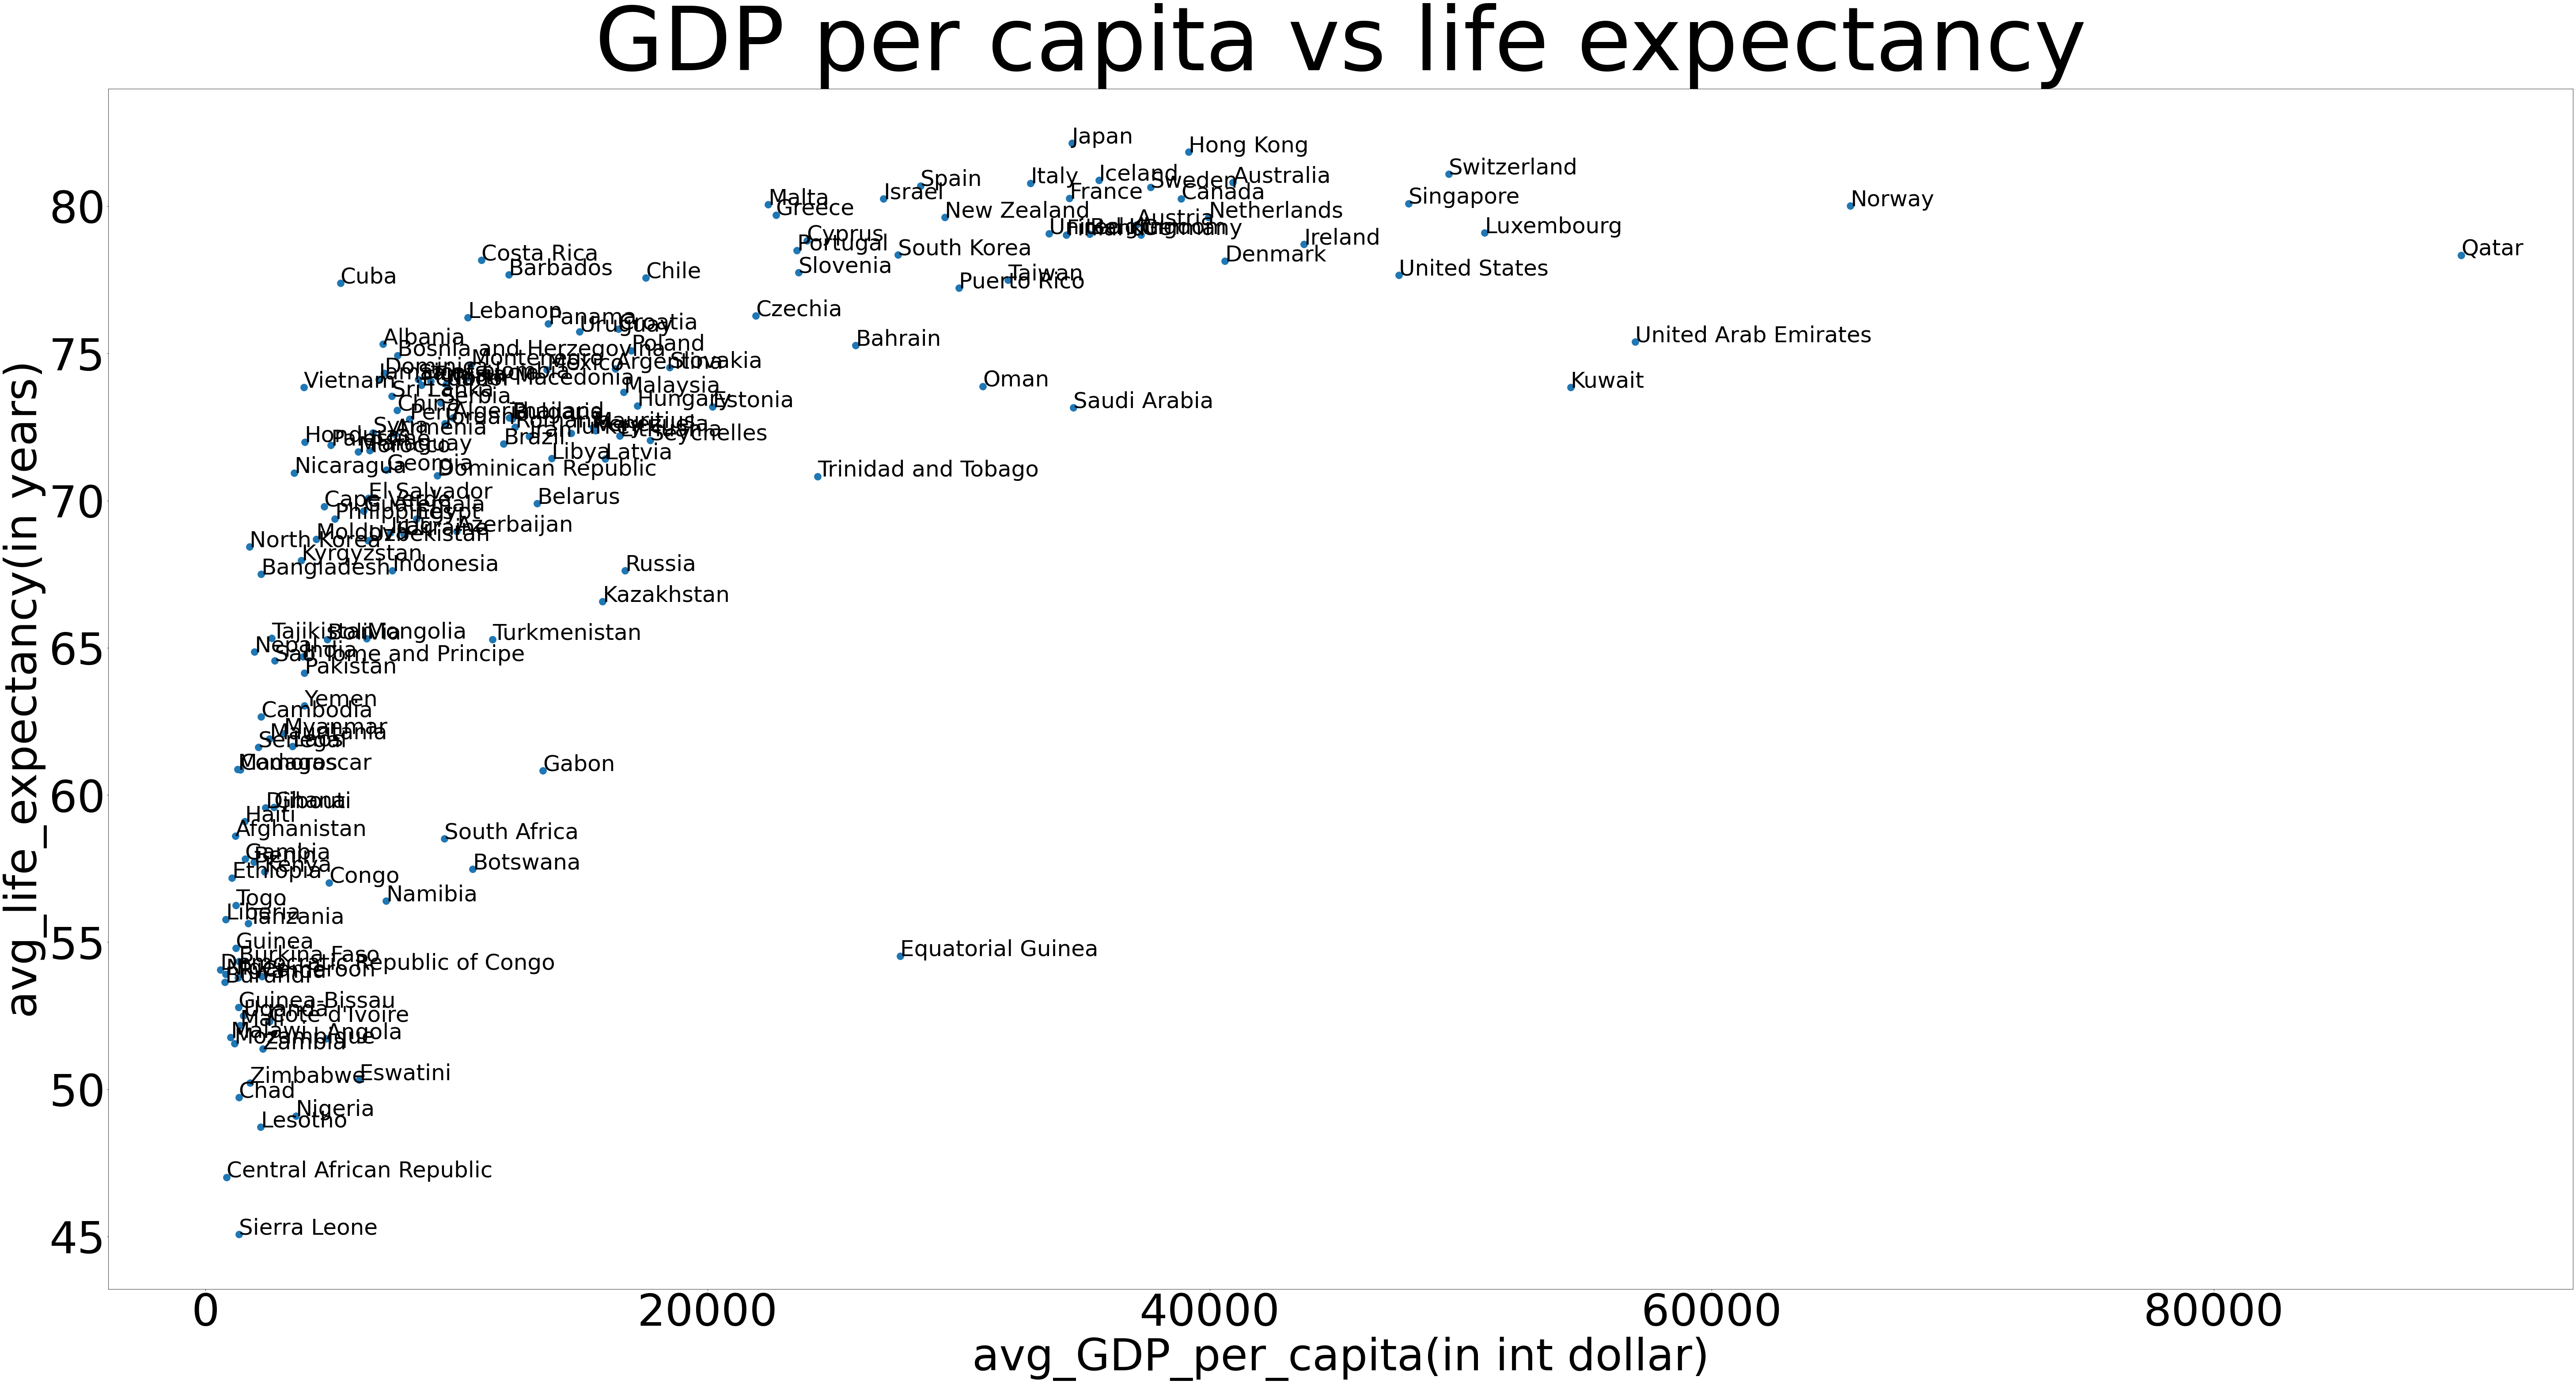

In [353]:
fig, ax = plt.subplots(figsize=(100, 50))
ax.scatter(x=new_df['avg_GDP_per_capita'], y=new_df['avg_life_exp'], s=250)
ax.set_xlabel('avg_GDP_per_capita(in int dollar)', size=100)
ax.set_ylabel('avg_life_expectancy(in years)', size=100)
ax.set_title('GDP per capita vs life expectancy', size=200)
ax.tick_params(axis='x', labelsize=100)
ax.tick_params(axis='y', labelsize=100)

for i, txt in enumerate(list(new_df['Country'])):
    ax.annotate(txt, (new_df.loc[i]['avg_GDP_per_capita'], new_df.loc[i]['avg_life_exp']), size=50)

### 1b. Consider whether the results obtained seem reasonable and discuss what might be the explanation for the results you obtained.

The results seem reasonable as generally it does seem like there is a positive relationship where countries that have higher GDP per capita seem to have a higher life expectancy.

The explanation is simple, where GDP per capita measures the economic output of a nation per person, and seeks to measure the prosperity of a nation. If a nation is doing well, it means that in general the citizens should be doing well and there should be proper access to necessities, food and healthcare. As such, citizens of those countries will tend to live longer as they are well nourished and when they get sick or catch diseases, there will be healthcare services they can turn to.

That being said, for all the countries that have GDP per capita (in int dollar) < 20000, most countries that have similar GDP per capita but varies alot in terms of life expectancy.

GDP per capita helps in estimating the life expectancy but is definitely not enough. For example, countries that are war-ridden, susceptibility to natural disasters etc.

### 1c. Did you do any data cleaning (e.g., by removing entries that you think are not useful) for the task of drawing scatter plot(s) and the task of answering the questions d, e, f, and g? If so, explain what kind of entries that you chose to remove and why.

1. I removed entries that did not have values for GDP per capita or Life expectancy
    - reason: There is no use for the data if it is missing, and there is no good way of filling in the data. Since I am already taking an average over the last 30 years, so removing the missing data is the equivalent of filling the data with the average of other years.

### 1d. Which countries have a life expectancy higher than one standard deviation above the mean?

In [354]:
overall_stats = df.describe()

In [355]:
overall_mean_life_exp = overall_stats.loc['mean']['Life expectancy']
overall_std_life_exp = overall_stats.loc['std']['Life expectancy']
overall_mean_GDP = overall_stats.loc['mean']['GDP']
overall_std_GDP = overall_stats.loc['std']['GDP']
overall_mean_GDP_per_capita = overall_stats.loc['mean']['GDP per capita']
overall_std_GDP_per_capita = overall_stats.loc['std']['GDP per capita']

In [357]:
high_le_df = new_df[new_df['avg_life_exp'] > overall_mean_life_exp + overall_std_life_exp]

In [358]:
print(list(high_le_df.Country)) # this is based on the average life expectancy over the past 30 years

['Australia', 'Austria', 'Belgium', 'Canada', 'Cyprus', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']


### 1e. Which countries have high life expectancy but have low GDP?

We define the following metrics:
- Low GDP: less than 0.3 std lower than the mean GDP
- High Life Expectancy: more than 0.3 std higher than the mean life expectancy

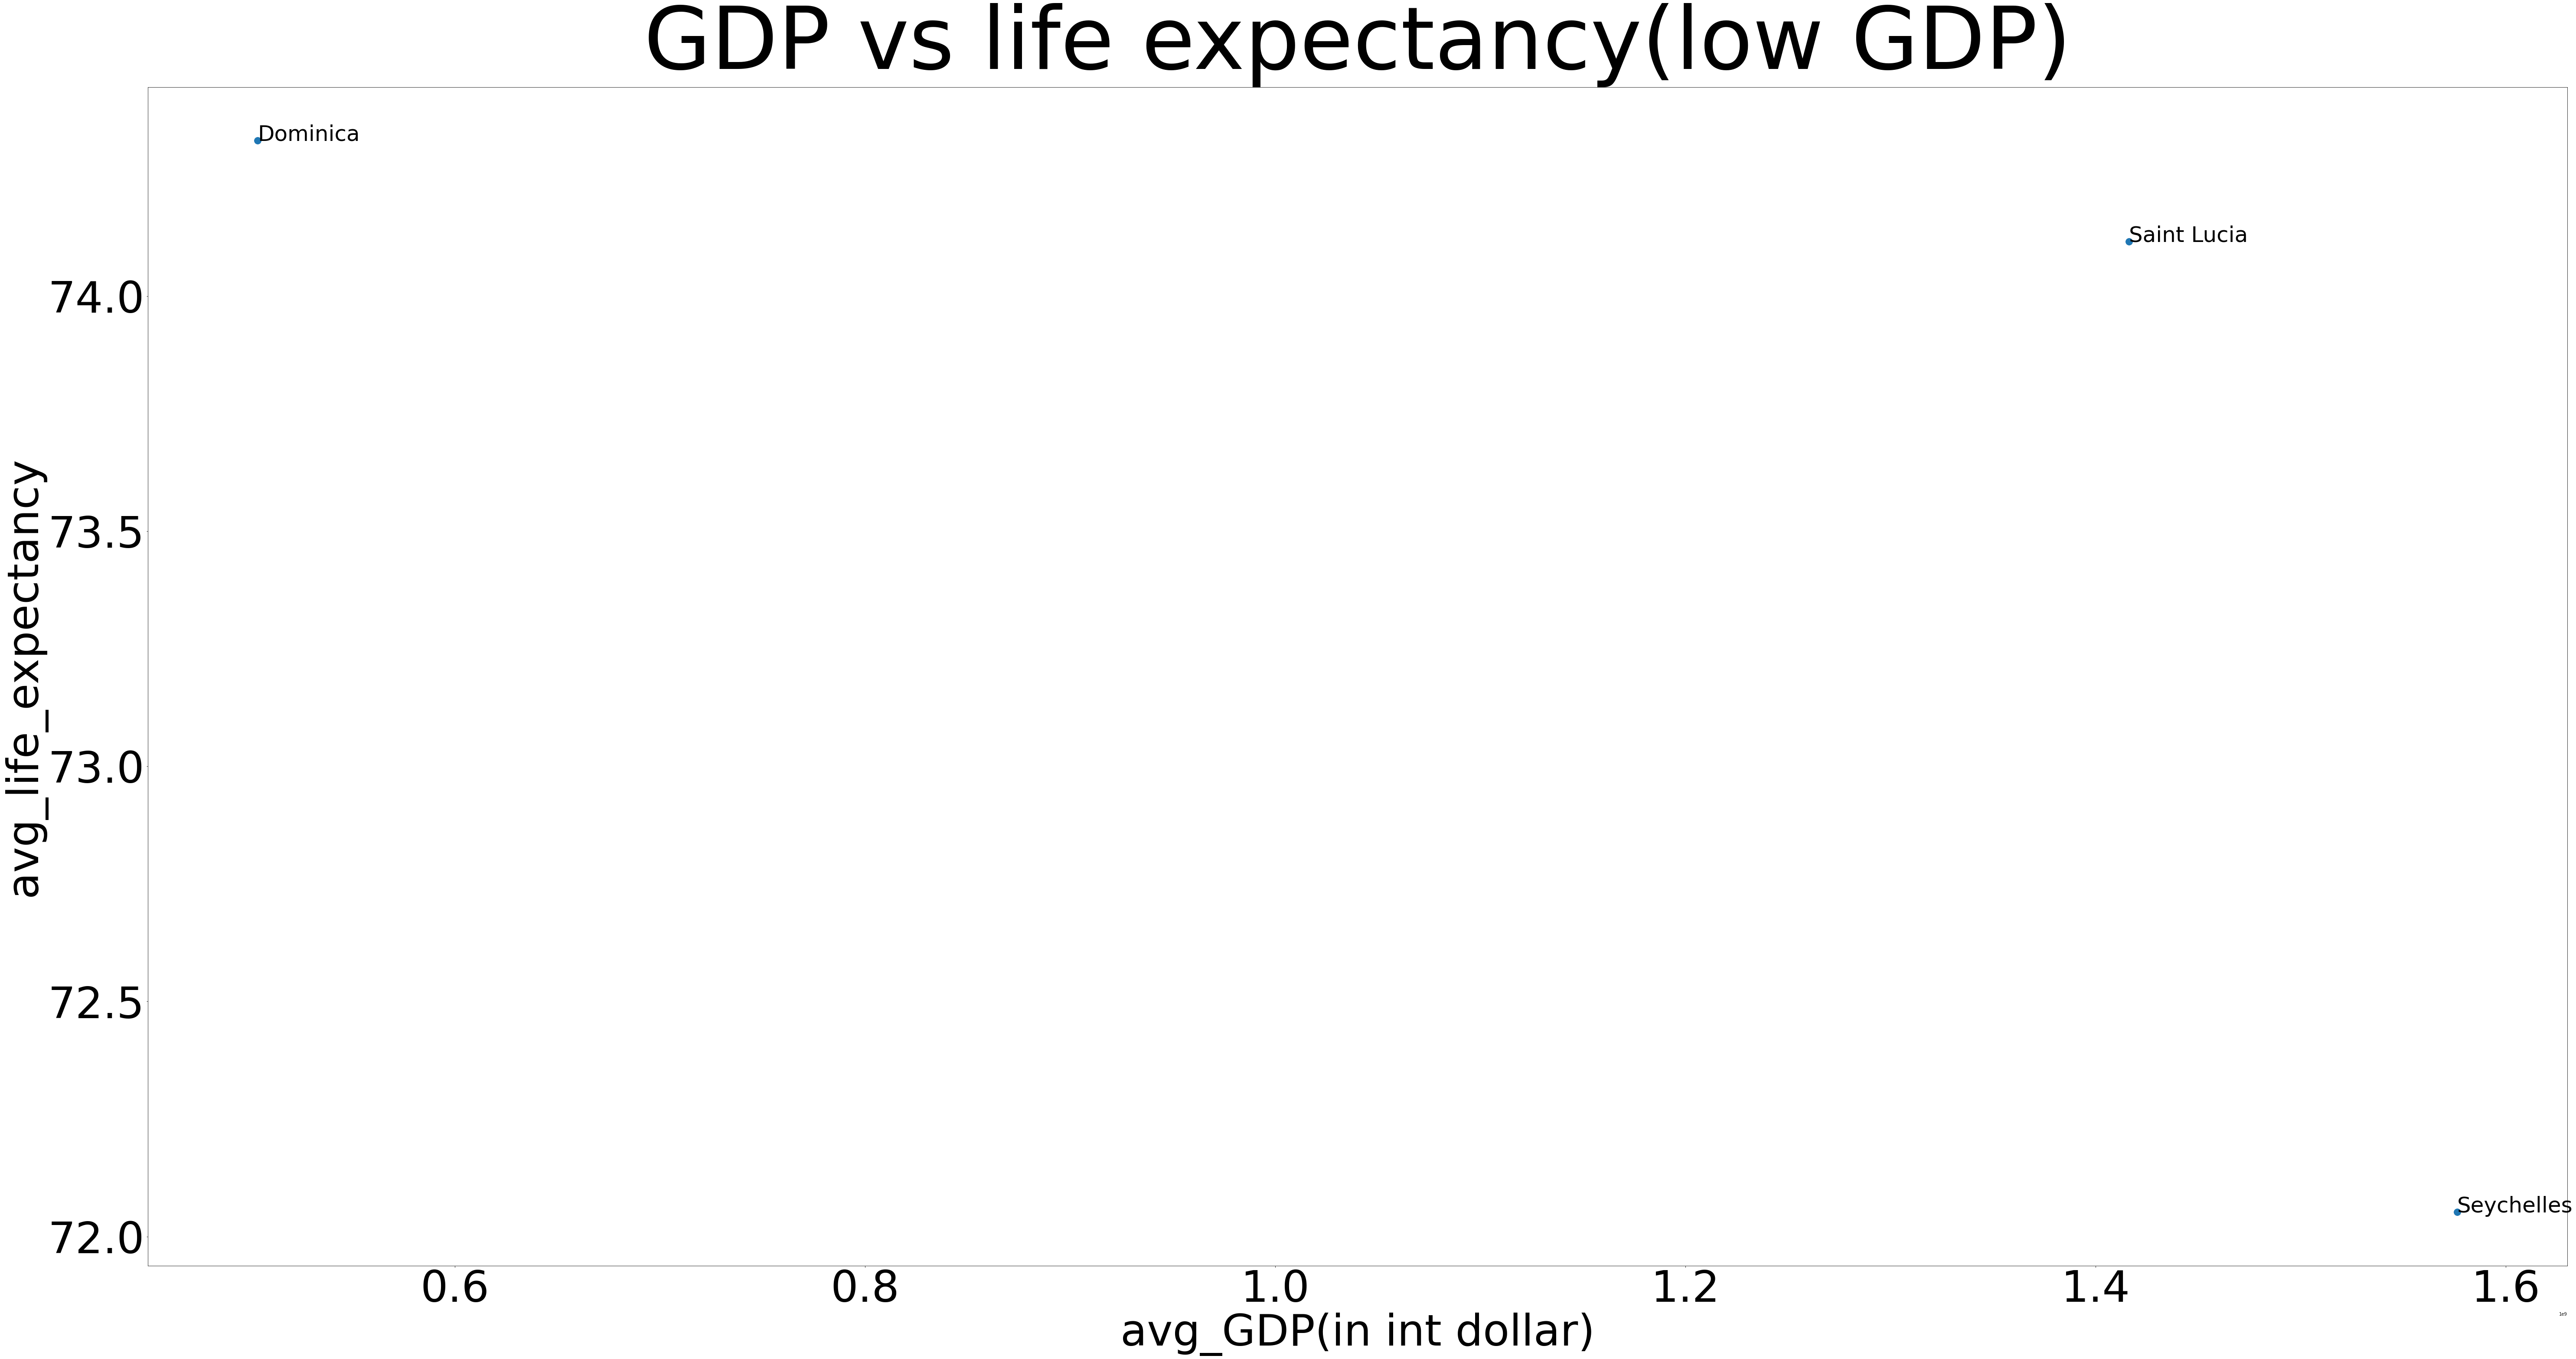

In [380]:
fig, ax1 = plt.subplots(figsize=(100, 50))
low_gdp_df = new_df[new_df['avg_GDP'] < overall_mean_GDP - overall_std_GDP * 0.3]
low_gdp_high_le_df = low_gdp_df[low_gdp_df['avg_life_exp'] > overall_mean_life_exp + overall_std_life_exp * 0.3]
low_gdp_high_le_df = low_gdp_high_le_df.reset_index()
ax1.scatter(x=low_gdp_high_le_df['avg_GDP'], y=low_gdp_high_le_df['avg_life_exp'], s=250)
ax1.set_xlabel('avg_GDP(in int dollar)', size=100)
ax1.set_ylabel('avg_life_expectancy', size=100)
ax1.set_title('GDP vs life expectancy(low GDP)', size=200)
ax1.tick_params(axis='x', labelsize=100)
ax1.tick_params(axis='y', labelsize=100)

for i, txt in enumerate(list(low_gdp_high_le_df['Country'])):
    ax1.annotate(txt, (low_gdp_high_le_df.loc[i]['avg_GDP'], low_gdp_high_le_df.loc[i]['avg_life_exp']), size=50)

The above graph is a closer look at countries with low and high Life expectancy based on our criterias!
They are as follows:


In [379]:
low_gdp_high_le_df

,index,Country,avg_GDP_per_capita,avg_life_exp,avg_GDP
0,42,Dominica,7120.260517,74.330346,503944051.591928
1,127,Saint Lucia,8478.758902,74.116,1416213394.725004
2,132,Seychelles,17711.056227,72.051923,1576358805.461689


### 1f. Does every strong economy (normally indicated by GDP) have high life expectancy?

We define the following metrics:
- High GDP: more than 0.3 std higher than the mean GDP
- High Life Expectancy: more than 0.3 std higher than the mean life expectancy

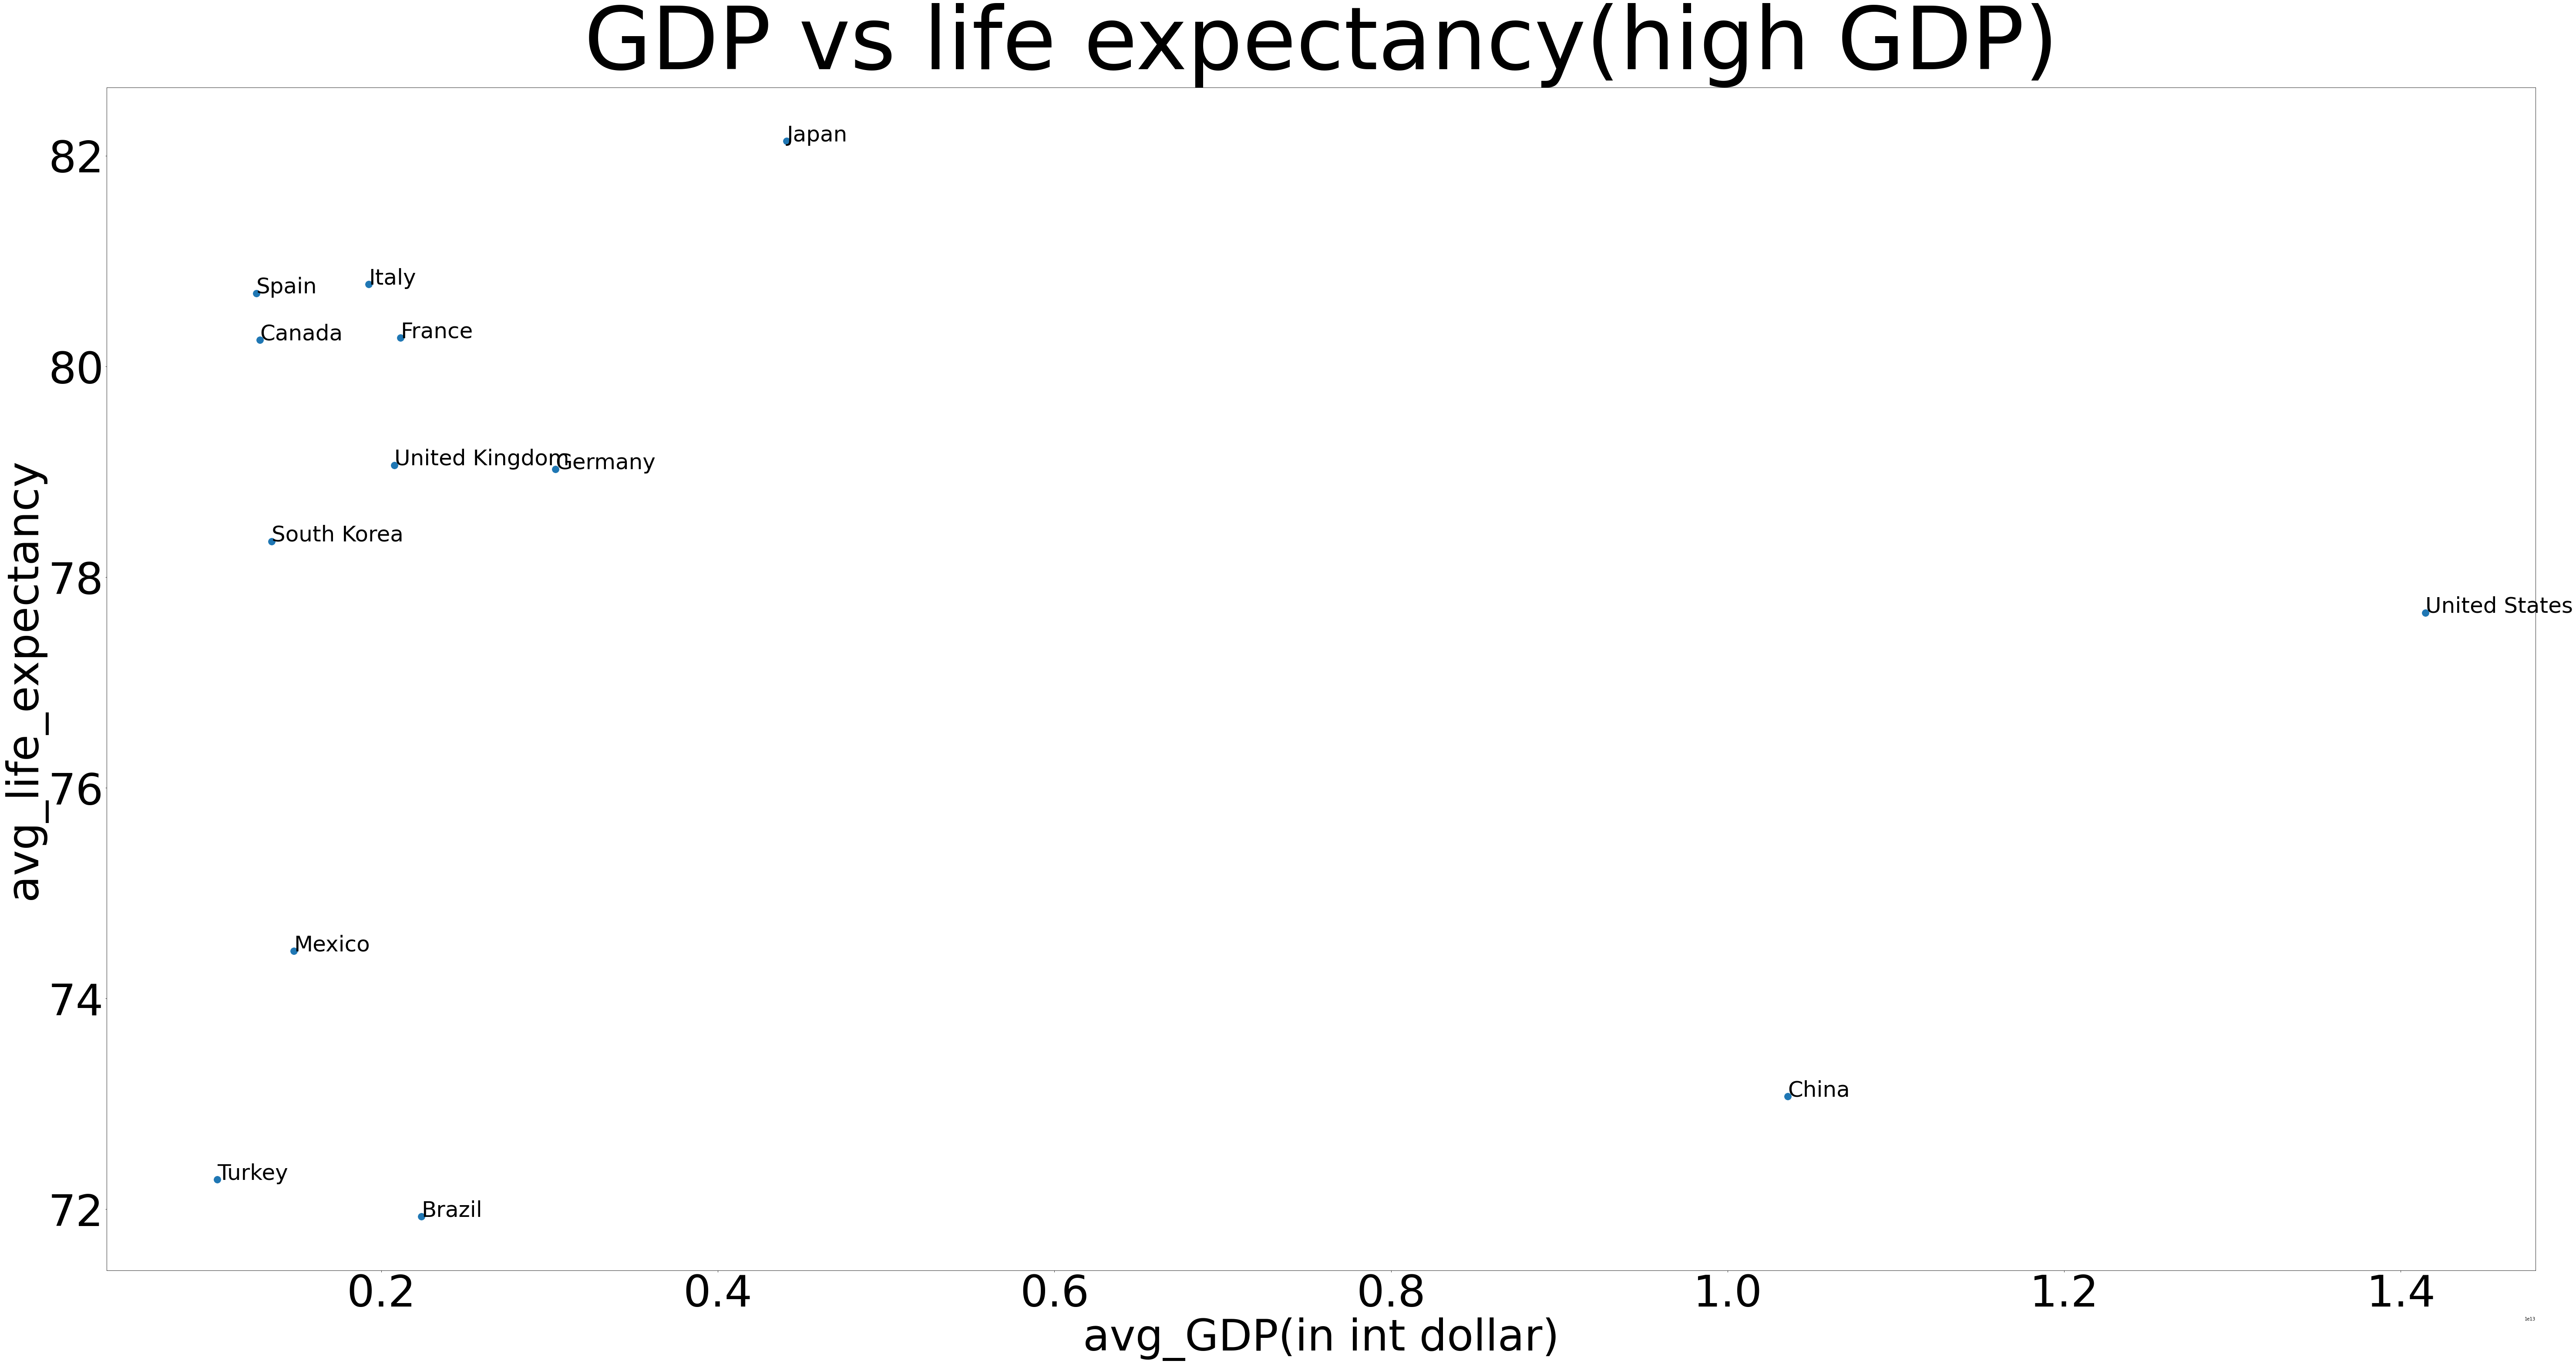

In [395]:
fig, ax2 = plt.subplots(figsize=(100, 50))
high_gdp_df = new_df[new_df['avg_GDP'] > overall_mean_GDP + overall_std_GDP * 0.3] # high based on our criteria
high_gdp_high_le_df = high_gdp_df[high_gdp_df['avg_life_exp'] > overall_mean_life_exp + overall_std_life_exp * 0.3]
high_gdp_high_le_df = high_gdp_high_le_df.reset_index()

slightly_lower_gdp_df = new_df[new_df['avg_GDP'] < overall_mean_GDP + overall_std_GDP * 0.3] # slightly lower than our criteria
slightly_lower_gdp_df = slightly_lower_gdp_df[slightly_lower_gdp_df['avg_GDP'] > overall_mean_GDP]

ax2.scatter(x=high_gdp_high_le_df['avg_GDP'], y=high_gdp_high_le_df['avg_life_exp'], s=250)
ax2.set_xlabel('avg_GDP(in int dollar)', size=100)
ax2.set_ylabel('avg_life_expectancy', size=100)
ax2.set_title('GDP vs life expectancy(high GDP)', size=200)
ax2.tick_params(axis='x', labelsize=100)
ax2.tick_params(axis='y', labelsize=100)

for i, txt in enumerate(list(high_gdp_high_le_df['Country'])):
    ax2.annotate(txt, (high_gdp_high_le_df.loc[i]['avg_GDP'], high_gdp_high_le_df.loc[i]['avg_life_exp']), size=50)

In general based on the plot above yes, however there are a couple of countries that have relatively higher GDP per capita but surprisingly low life expectancy:
- the following cell shows that there are countries that have slightly lower GDP, but significantly low life expectancy like:
    - Nigeria
    - South Africa
    - Pakistan

In [397]:
slightly_lower_gdp_df

,Country,avg_GDP_per_capita,avg_life_exp,avg_GDP
4,Argentina,16327.749887,74.483538,645866458090.486084
6,Australia,40928.640475,80.804423,866480282544.99292
45,Egypt,8406.650992,69.380346,676251963159.460205
69,Iran,12888.45335,72.178808,929947262219.775513
105,Netherlands,39960.373422,79.627462,654449101488.375488
109,Nigeria,3590.499944,49.101962,555226222223.074829
114,Pakistan,3927.316923,64.137846,664281128035.359131
120,Poland,16955.643142,75.100731,648927104151.201416
129,Saudi Arabia,34575.68765,73.159,918422351673.667725
137,South Africa,9519.367112,58.514269,473456298630.590698


### 1g. Related to question f, what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of g and f.

Now we define the following metrics:
- High GDP per capita: more than 0.3 std higher than the mean GDP per capita
- High Life Expectancy: more than 0.3 std higher than the mean life expectancy

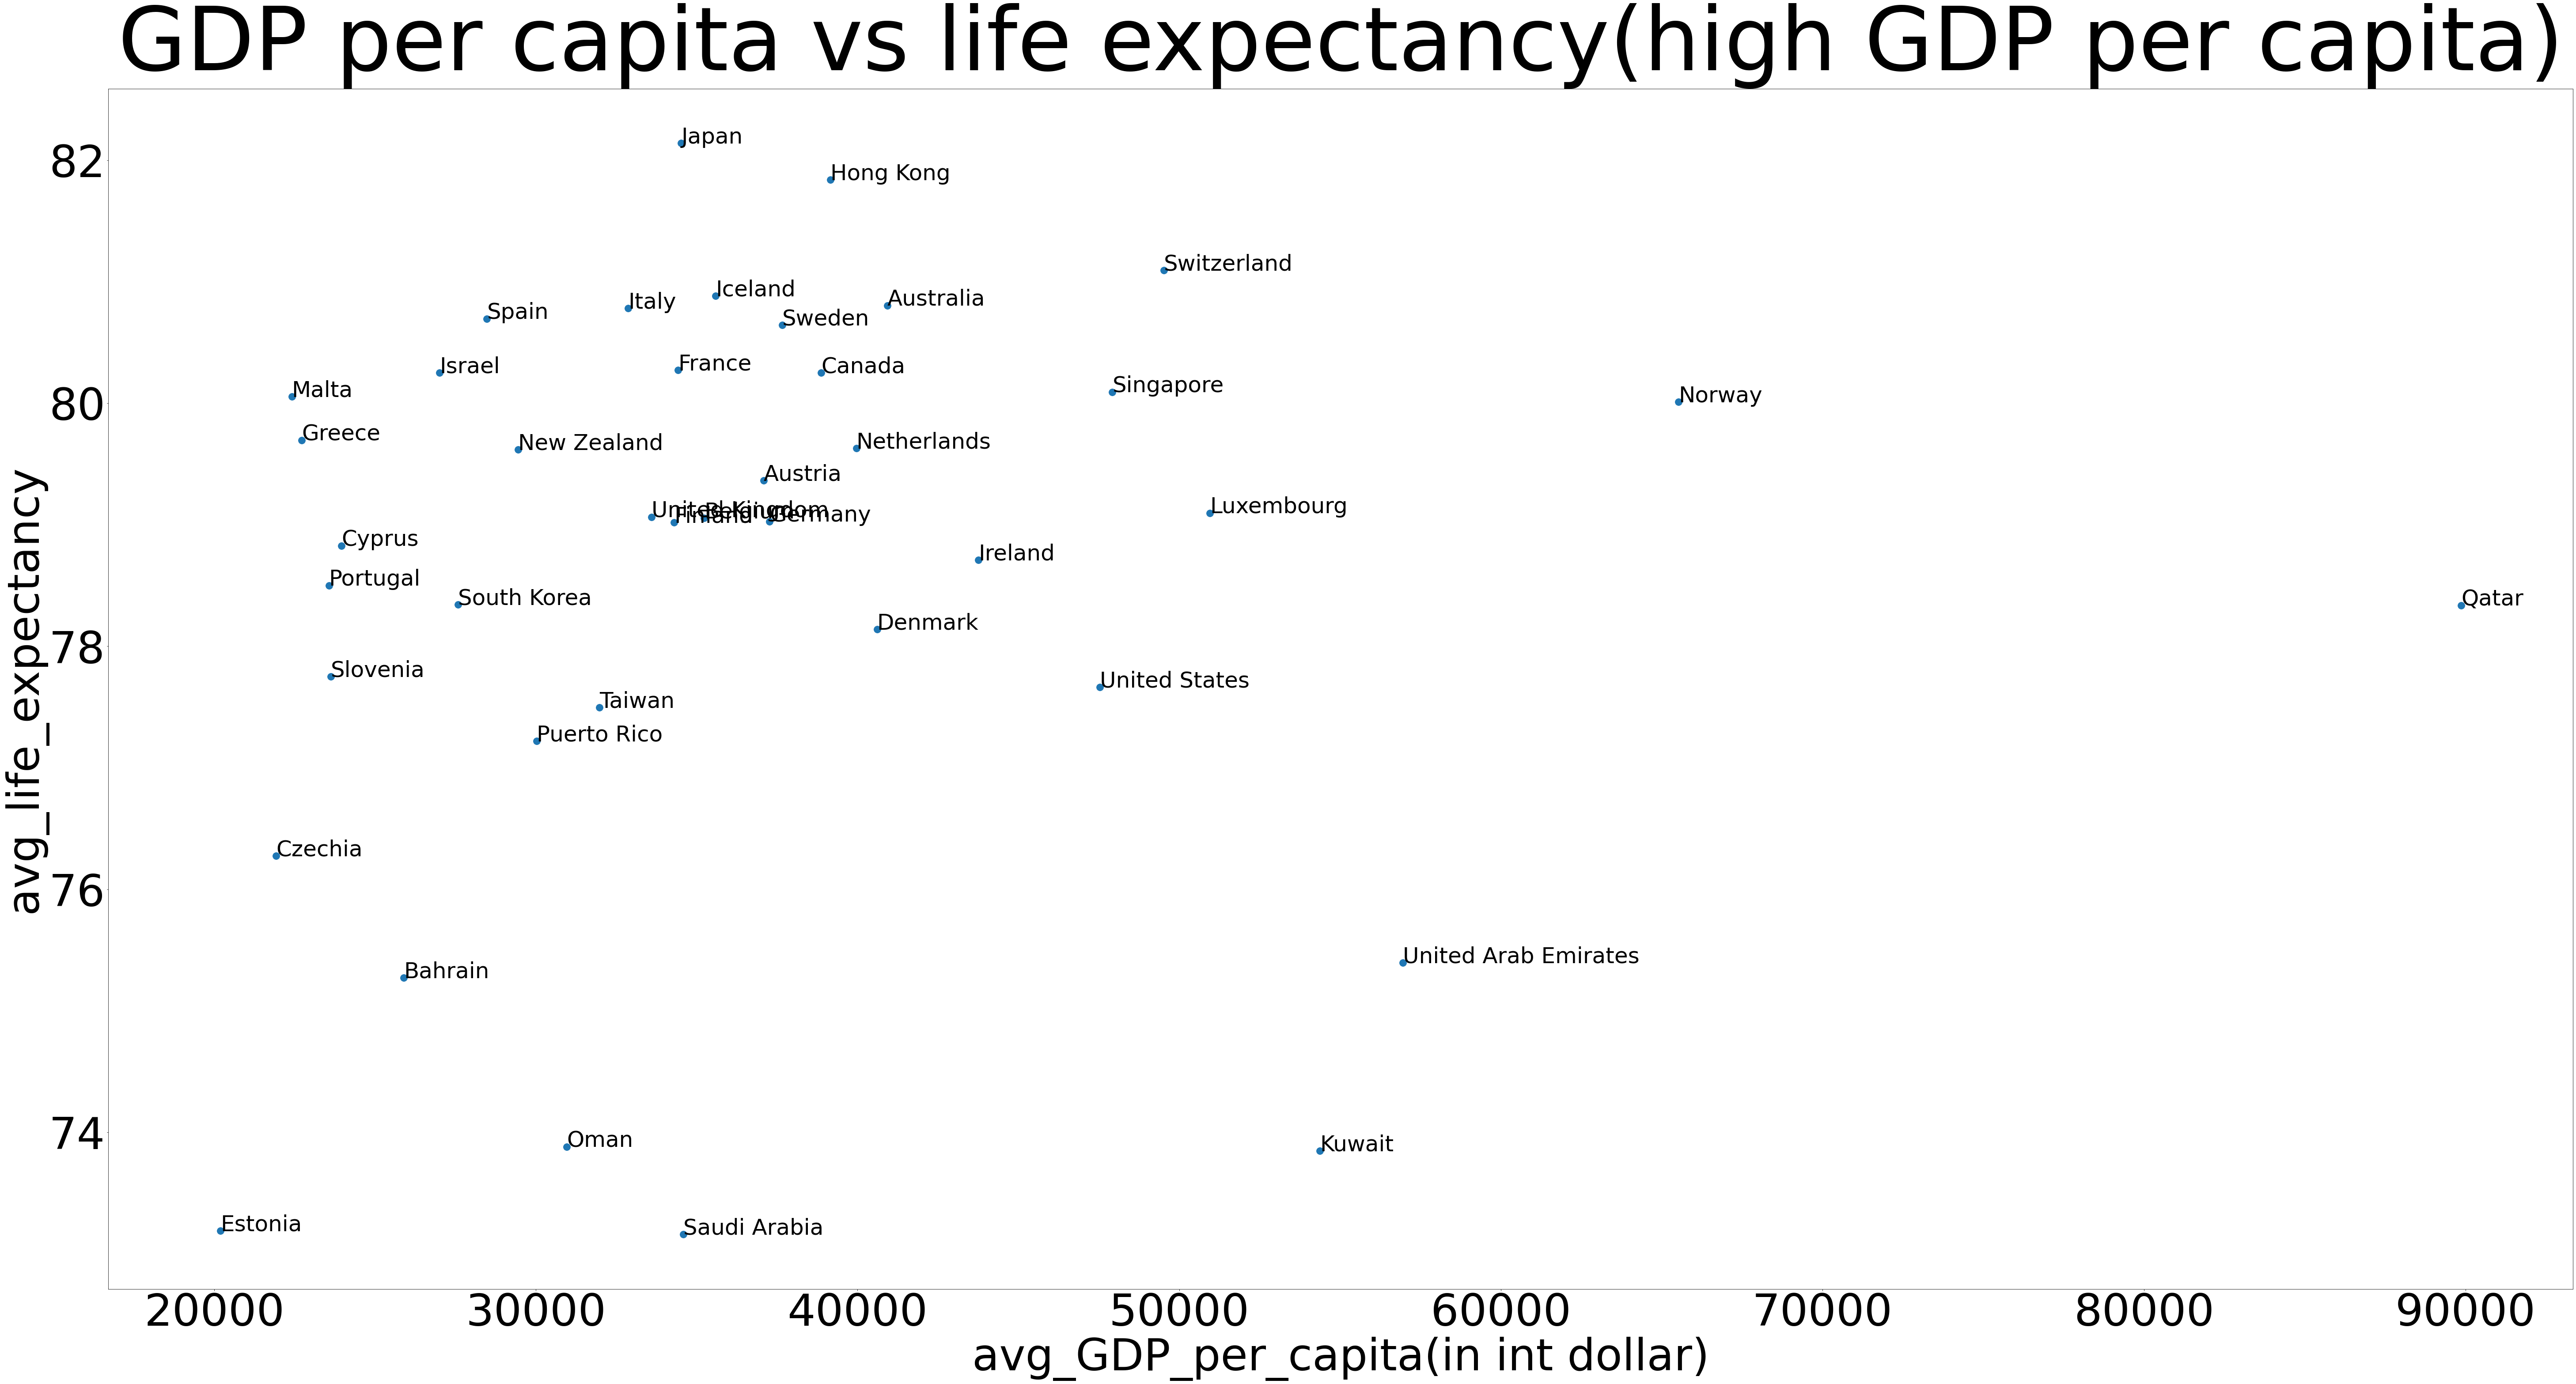

In [401]:
fig, ax3 = plt.subplots(figsize=(100, 50))
high_gdp_pc_df = new_df[new_df['avg_GDP_per_capita'] > overall_mean_GDP_per_capita + overall_std_GDP_per_capita * 0.3] # high based on our criteria
high_gdp_pc_high_le_df = high_gdp_pc_df[high_gdp_pc_df['avg_life_exp'] > overall_mean_life_exp + overall_std_life_exp * 0.3]
high_gdp_pc_high_le_df = high_gdp_pc_high_le_df.reset_index()

slightly_lower_gdp_pc_df = new_df[new_df['avg_GDP_per_capita'] < overall_mean_GDP_per_capita + overall_std_GDP_per_capita * 0.3] # slightly lower than our criteria
slightly_lower_gdp_pc_df = slightly_lower_gdp_pc_df[slightly_lower_gdp_pc_df['avg_GDP'] > overall_mean_GDP]

ax3.scatter(x=high_gdp_pc_high_le_df['avg_GDP_per_capita'], y=high_gdp_pc_high_le_df['avg_life_exp'], s=250)
ax3.set_xlabel('avg_GDP_per_capita(in int dollar)', size=100)
ax3.set_ylabel('avg_life_expectancy', size=100)
ax3.set_title('GDP per capita vs life expectancy(high GDP per capita)', size=200)
ax3.tick_params(axis='x', labelsize=100)
ax3.tick_params(axis='y', labelsize=100)

for i, txt in enumerate(list(high_gdp_pc_high_le_df['Country'])):
    ax3.annotate(txt, (high_gdp_pc_high_le_df.loc[i]['avg_GDP_per_capita'], high_gdp_pc_high_le_df.loc[i]['avg_life_exp']), size=50)

The trend still seems to hold, where countries with high GDP per capita seem to have high Life expectancy (based on our criteria), however we can observe that there are now many more countries as compared to 1f. This makes sense as a country's economic strength cannot just be dependent on its total output as the size of the economy and workforce plays a very large factor. By using per capita, we can see the "productivity" per person in a country, where the GDP is divided by the number of people in the country. As such, countries that are smaller in size but also still generating relatively high economic output are still considered strong economies, for example Singapore, Hong Kong etc.

In terms of the anomalies discussed in 1f, the same countries show up:
- Nigeria
- Pakistan
- South Africa

In [403]:
slightly_lower_gdp_pc_df

,Country,avg_GDP_per_capita,avg_life_exp,avg_GDP
4,Argentina,16327.749887,74.483538,645866458090.486084
18,Brazil,11871.656532,71.930538,2238784147271.281738
29,China,7635.640202,73.070538,10357588229939.742188
45,Egypt,8406.650992,69.380346,676251963159.460205
67,India,3885.968393,64.702808,4643188389000.407227
68,Indonesia,7439.837909,67.622231,1748034588658.826416
69,Iran,12888.45335,72.178808,929947262219.775513
96,Mexico,13589.569824,74.451154,1480356285996.056885
109,Nigeria,3590.499944,49.101962,555226222223.074829
114,Pakistan,3927.316923,64.137846,664281128035.359131
